In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [5]:
df = pd.read_csv('ex1data1.txt', sep=",")
df.columns = ["population", "profit"]
df.head()

,population,profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [6]:
data = df.values
type(data)

numpy.ndarray

**Separate feature and target columns**

[numpy horizontal split](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hsplit.html)

In [7]:
X, y = np.hsplit(data, 2)
print("shape of feature vector X--->" + str(X.shape))
print("shape of target vector y --->" + str(y.shape))

shape of feature vector X--->(96, 1)
shape of target vector y --->(96, 1)


In [0]:
m = y.shape[0]
model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Get the coefficients
theta0, theta1 = model.intercept_, model.coef_
theta0, theta1

(array([-4.21150401]), array([[1.21354725]]))

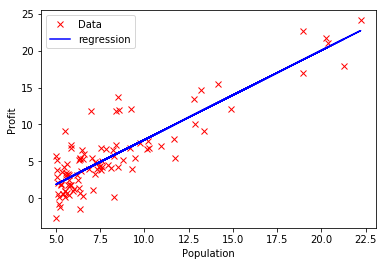

In [13]:
# plot the data points and result
plt.plot(X, y, 'rx', label='Data')
plt.plot(X, model.predict(X), 'b-', label='regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()

In [15]:
# calculate training MSE and model score
mse = np.mean((model.predict(X) - y) ** 2)
score = model.score(X, y)
print("MSE ===>" + str(mse))
print("score ===>" + str(score))

MSE ===>6.919163806316008
score ===>0.7606583419339847


In [16]:
# LinearRegression above internally added a column vector of 1s.
# For the following calculations, this must be done explicitly.
X = np.c_[np.ones(m), X]
X.shape

(96, 2)

**Least Squares**

Refer to [this](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)  for more information on numpy least squares

In [20]:
# This is what happens in Linear Regression
theta = np.linalg.lstsq(X, y)[0]
theta

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[-4.21150401],
       [ 1.21354725]])

In [21]:
theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
theta

array([[-4.21150401],
       [ 1.21354725]])

In [23]:
# with explicit inverse
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([[-4.21150401],
       [ 1.21354725]])

In [0]:
# Cost function MSE
def cost(X, y, theta):
    diff = X.dot(theta) - y
    return np.sum(diff * diff, axis=0) / y.size

Text(0.5, 1.0, 'Cost function')

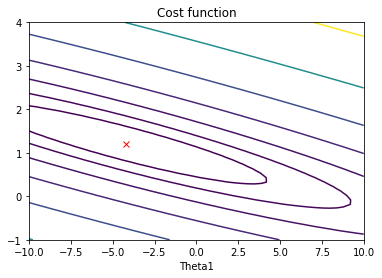

In [28]:
# Create a 50*50 grid for Theta0 and Theta1 ranges
grid = np.mgrid[-10:10:50j, -1:4:50j]

# Theta values in an array of shape (2500,2)
Thetas = np.c_[grid[0].ravel(), grid[1].ravel()]

# compute costs on the theta grid
cost_ = cost(X, y, Thetas.T)

# cost values reshape to grid
cost_grid = cost_.reshape(grid[0].shape)

plt.contour(grid[0], grid[1], cost_grid, levels=[20, 40, 80, 160, 320, 640, 1280])

# Plot optmimum
plt.plot(theta[0], theta[1], 'rx')

# Title and axis labels
plt.xlabel('Theta0')
plt.xlabel('Theta1')
plt.title('Cost function')

# Linear Regression with multiple variables



In [29]:
!ls

ex1data1.txt  ex1data2.txt  sample_data


In [30]:
df_ = pd.read_csv('ex1data2.txt', sep=',')
df_.columns = ['size' , 'number_of_bedrooms', 'price']
df_.head()

,size,number_of_bedrooms,price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [33]:
# split data
data = df_.values
X, y = np.hsplit(data, np.array([2]))
print(X.shape)
print(y.shape)

(46, 2)
(46, 1)


In [0]:
scaler = StandardScaler()
regressor = LinearRegression()

model = Pipeline([('scaler', scaler), ('regressor', regressor)])

In [36]:
model.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

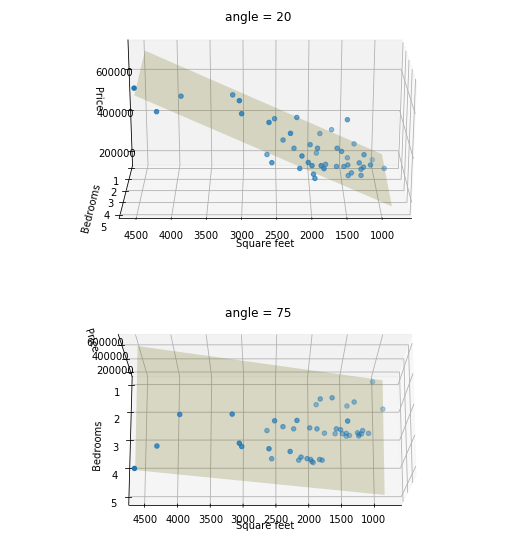

In [45]:
# min and max values for grid range
range_grid = np.vstack([X.min(axis=0), X.max(axis=0)])
grid = np.meshgrid(range_grid[:, 0], range_grid[:, 1])

# Compute predictions from grid values
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

def plot_data_and_regression(fig, fignum, view_angle):
    sp = fig.add_subplot(2, 1, fignum, projection='3d')
    sp.view_init(view_angle, 90)
    sp.set_xlabel('Square feet')
    sp.set_ylabel('Bedrooms')
    sp.set_zlabel('Price')
    sp.set_title(f'angle = {view_angle}')
    # customise tick locators
    sp.yaxis.set_major_locator(ticker.MultipleLocator(1.00))
    sp.zaxis.set_major_locator(ticker.MultipleLocator(200000))

    # plot examples
    sp.scatter(X[:,0], X[:,1], y)
    # Plot regression area
    sp.plot_surface(grid[0], grid[1], y_grid, color='y', alpha=0.2)

fig = plt.figure(2, figsize=[9, 10])

# Plot data and regression from two different angles
plot_data_and_regression(fig, fignum=1, view_angle=20)
plot_data_and_regression(fig, fignum=2, view_angle=75)

In [47]:
# training mse and score
mse = np.mean((model.predict(X) - y) ** 2)
score = model.score(X, y)
print("mse ====> "+ str(mse))
print("score ===>" + str(score))

mse ====> 4133005563.4236116
score ===>0.7343207791741682


In [0]:
# solve anlytically 
m = y.size
X = np.c_[np.ones(m), X]

In [51]:
theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
theta

array([[87807.75019324],
       [  138.75587842],
       [-8186.38287595]])

In [52]:
# Solve normal equation (explicit pseudo-inverse)
theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([[87807.75019149],
       [  138.75587842],
       [-8186.38287541]])

In [54]:
cost(X,y, theta)

array([4.13300556e+09])